# 颜色空间的转换-RGB和YCbCr

## 1、RGB转换成YCbCr

计算公式如下:
![](doc_imgs/01.png)

In [40]:
#coding:utf-8
import numpy as np
import scipy.linalg
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

In [41]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)
R = src[:,:,0]
G = src[:,:,1]
B = src[:,:,2]

In [42]:
YCbCrYRF = 0.299      # RGB转YCbCr的系数(浮点类型）
YCbCrYGF = 0.587
YCbCrYBF = 0.114
YCbCrCbRF = -0.168736
YCbCrCbGF = -0.331264
YCbCrCbBF = 0.500000
YCbCrCrRF = 0.500000
YCbCrCrGF = -0.418688
YCbCrCrBF = -0.081312

RGBRYF = 1.00000    # YCbCr转RGB的系数(浮点类型）
RGBRCbF = 0.0000
RGBRCrF = 1.40200
RGBGYF = 1.00000  
RGBGCbF = -0.34414
RGBGCrF = -0.71414
RGBBYF = 1.00000  
RGBBCbF = 1.77200
RGBBCrF = 0.00000 

Shift = 20
HalfShiftValue = 1 << (Shift - 1)

YCbCrYRI = int((YCbCrYRF * (1 << Shift) + 0.5)) # RGB转YCbCr的系数(整数类型）
YCbCrYGI = int((YCbCrYGF * (1 << Shift) + 0.5))
YCbCrYBI = int((YCbCrYBF * (1 << Shift) + 0.5))
YCbCrCbRI = int((YCbCrCbRF * (1 << Shift) + 0.5))
YCbCrCbGI = int((YCbCrCbGF * (1 << Shift) + 0.5))
YCbCrCbBI = int((YCbCrCbBF * (1 << Shift) + 0.5))
YCbCrCrRI = int((YCbCrCrRF * (1 << Shift) + 0.5))
YCbCrCrGI = int((YCbCrCrGF * (1 << Shift) + 0.5))
YCbCrCrBI = int((YCbCrCrBF * (1 << Shift) + 0.5))

RGBRYI = int((RGBRYF * (1 << Shift) + 0.5))      # YCbCr转RGB的系数(整数类型）
RGBRCbI = int((RGBRCbF * (1 << Shift) + 0.5))
RGBRCrI = int((RGBRCrF * (1 << Shift) + 0.5))
RGBGYI = int((RGBGYF * (1 << Shift) + 0.5))
RGBGCbI = int((RGBGCbF * (1 << Shift) + 0.5))
RGBGCrI = int((RGBGCrF * (1 << Shift) + 0.5))
RGBBYI = int((RGBBYF * (1 << Shift) + 0.5))
RGBBCbI = int((RGBBCbF * (1 << Shift) + 0.5))
RGBBCrI = int((RGBBCrF * (1 << Shift) + 0.5)) 

In [43]:
def RGB2YCbCr(src):
    rgb = np.int32(src)
    Red = rgb[:,:,0]
    Green = rgb[:,:,1]
    Blue = rgb[:,:,2]
    dst = np.zeros_like(rgb)
    
    Y = (YCbCrYRI * Red + YCbCrYGI * Green + YCbCrYBI * Blue + HalfShiftValue) >> Shift
    Cb = ( 128 + ( (YCbCrCbRI * Red + YCbCrCbGI * Green + YCbCrCbBI * Blue + HalfShiftValue) >> Shift))
    Cr = (128+( (YCbCrCrRI * Red + YCbCrCrGI * Green + YCbCrCrBI * Blue + HalfShiftValue) >> Shift))
    
    dst[:,:,0] = Y
    dst[:,:,1] = Cb
    dst[:,:,2] = Cr
    
    return dst

In [44]:
YCbCr = RGB2YCbCr(src)

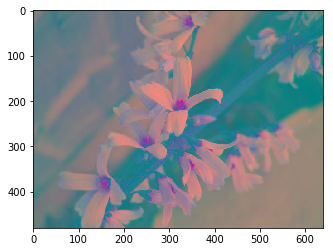

In [45]:
plt.imshow(cv2.convertScaleAbs(YCbCr))

## 2、YCbCr转换成RGB

计算公式如下:
![](doc_imgs/02.png)

In [46]:
def YCbCr2RGB(YCbCr):
    Y = YCbCr[:,:,0]
    Cb = YCbCr[:,:,1] - 128
    Cr = YCbCr[:,:,2] - 128
    
    rgb = np.zeros(YCbCr.shape,dtype=np.int32)
    
    Red = Y + ((RGBRCrI * Cr + HalfShiftValue) >> Shift)
    Green = Y + ((RGBGCbI * Cb + RGBGCrI * Cr+ HalfShiftValue) >> Shift)
    Blue = Y + ((RGBBCbI * Cb + HalfShiftValue) >> Shift)
    
    rgb[:,:,0] = Red
    rgb[:,:,1] = Green
    rgb[:,:,2] = Blue
    
    return rgb

In [47]:
rgb = YCbCr2RGB(YCbCr)

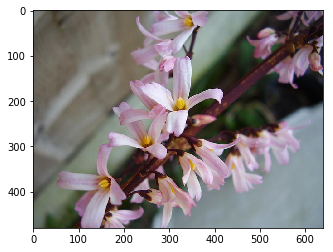

In [48]:
plt.imshow(cv2.convertScaleAbs(rgb))

## 调用OpenCV函数

In [49]:
YCrCb = cv2.cvtColor(src,cv2.COLOR_BGR2YCrCb)

Text(0.5,1,'RGB->YCrCb')

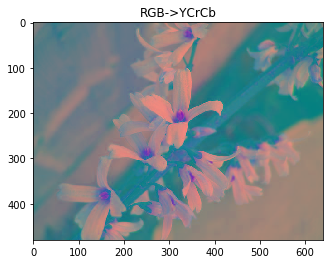

In [50]:
plt.imshow(YCrCb)
plt.title('RGB->YCrCb')

In [51]:
rgb = cv2.cvtColor(YCrCb,cv2.COLOR_YCrCb2BGR)

Text(0.5,1,'YCbCr->RGB')

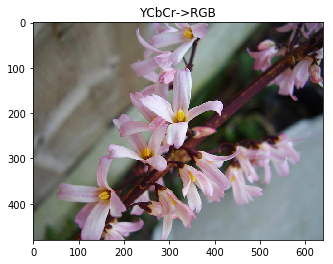

In [36]:
# rgb = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.title('YCbCr->RGB')

参考：

[1].https://www.cnblogs.com/Imageshop/archive/2013/02/14/2911309.html

[2].https://www.cnblogs.com/yunfung/p/7614522.html